# Calculate the Electric Field at a Point from a List of Given Point Charges

Created on Mon Dec 30 22:14:10 2019;
EfieldPoints calculates the magnitude of the electric field from a given list 
of point charges. It takes as inputs a list of positions (tuples) and of 
charges and the specified point, P (also a tuple). It then calculates the 
electric field at P due to the provided charges. All values should be entered 
in SI units. For fun, the positions of the charges are plotted in a scatter 
plot with darker red color indicating more negative charge. Point P is plotted
in blue, with a vector indicating the direction of the electric field at P, 
but is not scaled to the magnitude of the filed. The field's magnitude is 
returned. 

In [65]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Set the number of charges, their charges and positions, and point P.

In [66]:
num_charges=200
q=np.random.randn(num_charges)*10**-12
if num_charges <= 30:
    print(q)

In [67]:
P=(1,2,1)

In [68]:
positions=[]
for i in range(0,3):
    positions.append(np.random.randn(num_charges)*1.7)
positions=list(zip(*positions))
if num_charges <= 30:
    print(positions)

## Define the function that calculates the field at P and plots the points with the field direction indicated as a vector from P.

In [71]:
def EfieldPoints(q,positions,P):
    xlist=[]
    ylist=[]
    zlist=[]
    xvec=[]
    yvec=[]
    zvec=[]
    for x,y,z in positions:
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)
        
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(xlist,ylist,zlist,c='r',marker='o')
    ax.scatter(P[0],P[1],P[2],c='b',marker='o')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-4,4)
    plt.title('The Electric Field from Point Charges')
    
    charges=list(zip(q,positions))
    charges.sort()
    e0=8.854*10**-12
    k=1/(4*math.pi*e0)
    field=0
    for i in charges:
        p=i[1]
        xvec.append(P[0]-p[0])
        yvec.append(P[1]-p[1])
        zvec.append(P[2]-p[2])
        if i[0] < 0:
            xvec[-1]=xvec[-1]*-1
            yvec[-1]=yvec[-1]*-1
            zvec[-1]=zvec[-1]*-1
        r=math.sqrt((P[0]-p[0])**2+(P[1]-p[1])**2+(P[2]-p[2])**2)
        E=i[0]/r**2
        field=field+E
    U=np.sum(xvec)
    V=np.sum(yvec)
    W=np.sum(zvec)
    mag=np.sqrt(U**2+V**2+W**2)
    U=U/mag
    V=V/mag
    W=W/mag
    
    ax.quiver(P[0],P[1],P[2],U,V,W,arrow_length_ratio=.3)
    field = round(k*field,6)
    plt.show()
    print("E=",field,"Coulombs")
    return(field)

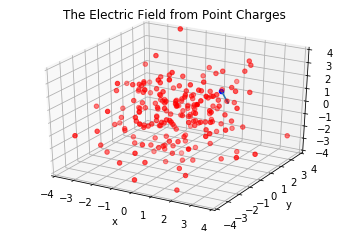

E= 0.019847 Coulombs


0.019847

In [72]:
EfieldPoints(q,positions,P)